#### Importing libraries and data ####

In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy.stats import kstest, anderson, chisquare, shapiro
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='once')
data_red = pd.read_csv('~/frida_ml_repo/rm_ucl/msc_dsml/intro_to_stat_ds/assignment/data/winequality-red.csv',delimiter=';')
data_white = pd.read_csv('~/frida_ml_repo/rm_ucl/msc_dsml/intro_to_stat_ds/assignment/data/winequality-white.csv',delimiter=';')

#### Setting masks ####

In [23]:
mask_low_red = (data_red['quality']<=4)
mask_mid_red = ((data_red['quality']>4) & (data_red['quality']<7))
mask_high_red = (data_red['quality']>=7)
mask_all_red = (data_red['quality']>=0)


mask_low_white = (data_white['quality']<=4)
mask_mid_white = ((data_white['quality']>4) & data_white['quality']<7)
mask_high_white = (data_white['quality']>=7)

/Users/rossmurphy/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Defining functions ####

In [180]:
def chisquare_func(mask_variable,column_variable,data_variable,bin_number=5,freedegree=1):

    data_to_use = data_variable[mask_variable]
    data_to_use['Bin'] = pd.cut(data_to_use[column_variable], data_to_use[column_variable].quantile(np.linspace(0.1,1,bin_number)).values)

    normal_data = np.random.normal(data_to_use[column_variable].mean(),data_to_use[column_variable].std(),len(data_to_use))
    normal_df = pd.DataFrame(normal_data,columns = [column_variable])
    normal_df['Bin'] = pd.cut(normal_df[column_variable], normal_df[column_variable].quantile(np.linspace(0.1,1,bin_number)).values)

    data_test = data_to_use.groupby('Bin').count()[column_variable]
    normal_test = normal_df.groupby('Bin').count()[column_variable]
    
    min_data_test = np.min(data_test.values)
    min_normal_test = np.min(normal_test.values)
    
    statistic , p_value = chisquare(data_test,normal_test,ddof=freedegree) 
    
    print('the min count in a bin is {}'.format(np.min([min_data_test,min_normal_test])))
    print('the degrees of freedom used is {}'.format(freedegree))
    
    return statistic, p_value

def ks_func(mask_variable,column_variable,data_variable):

    data_to_use = data_variable[mask_variable][column_variable]

    statistic , p_value = kstest(data_to_use, 'norm', args=(data_to_use.mean(), data_to_use.std()))   
    
    return np.array([statistic, p_value])

def anderson_func(mask_variable,column_variable,data_variable):

    data_to_use = data_variable[mask_variable][column_variable]
    stat = anderson(data_to_use, 'norm')[0]
    fivecritical = anderson(data_to_use, 'norm')[1][2]
    if stat > fivecritical:
        booleanval = 'True'
    else:
        booleanval = 'False'
    
    return np.array([stat,fivecritical,booleanval])

def anderson_func_old(mask_variable,column_variable,data_variable):

    data_to_use = data_variable[mask_variable][column_variable]
    anderson(data_to_use, 'norm')[0]
    
    return anderson(data_to_use, 'norm')


def shapiro_func(mask_variable,column_variable,data_variable):

    data_to_use = data_variable[mask_variable][column_variable]

    return np.array([shapiro(data_to_use)])

def compare_plot(mask_variable,column_variable,data_variable):
    
    data_to_use = data_variable[mask_variable][column_variable]

    rvs = np.random.normal(data_to_use.mean(),data_to_use.std(),len(data_to_use))
    
    norm_cdf = scipy.stats.norm.cdf(rvs)
    observed_cdf = scipy.stats.norm.cdf(data_to_use)
    
    sns.lineplot(x=rvs, y=norm_cdf)
    sns.lineplot(x=data_to_use, y=observed_cdf)
    plt.show()

In [4]:
def new_chisquare_func(mask_variable,column_variable,data_variable,bin_number=5,freedegree=1):

    bin_number = bin_number+1
    data_to_use = data_variable[mask_variable]
    data_to_use['Bin'] = pd.cut(data_to_use[column_variable], data_to_use[column_variable].quantile(np.linspace(0.00000,1,bin_number)).values)

    normal_data = np.random.normal(data_to_use[column_variable].mean(),data_to_use[column_variable].std(),len(data_to_use)*100000)
    normal_df = pd.DataFrame(normal_data,columns = [column_variable])
    normal_df['Bin'] = pd.cut(normal_df[column_variable], data_to_use[column_variable].quantile(np.linspace(0.00000,1,bin_number)).values) # use same bin as observed

    data_test = data_to_use.groupby('Bin').count()[column_variable]
    data_test[0] = data_test.copy()[0]+1
    normal_test = normal_df.groupby('Bin').count()[column_variable]
    normal_test /= 100000.0
    
    min_data_test = np.min(data_test.values)
    min_normal_test = np.min(normal_test.values)
    
    statistic , p_value = chisquare(data_test,normal_test,ddof=freedegree) 
    
    print('the min count in a bin is {}'.format(np.min([min_data_test,min_normal_test])))
    print('the degrees of freedom used is {}'.format(freedegree))
    
    return statistic, p_value

#### Examples ####

#### Testing the low and high quality subsets of the data using standard tests

In [181]:
anderson_func(mask_variable=mask_high_red,column_variable='pH',data_variable=data_red)

array(['1.0104986663271234', '0.773', 'True'], dtype='<U32')

In [175]:
anderson_func_old(mask_variable=mask_high_red,column_variable='pH',data_variable=data_red)

AndersonResult(statistic=1.0104986663271234, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

#### Chi-Squared DF

In [33]:
dfforlatex = pd.DataFrame(index=['Low Quality','Medium Quality','High Quality','Full Data'],columns=['Test Statistic','P-Value','Bin Number'],data=0)
dfforlatex.iloc[0,:] = np.array([10.4,0.015,6])
dfforlatex.iloc[1,:] = np.array([142.04,1.41e-17,30])
dfforlatex.iloc[2,:] = np.array([17.34,0.137,15])
dfforlatex.iloc[3,:] = np.array([69.67,0.0004,38])
print(dfforlatex.to_latex(float_format=lambda x: '%.3f' % x))

\begin{tabular}{lrrr}
\toprule
{} &  Test Statistic &  P-Value &  Bin Number \\
\midrule
Low Quality    &          10.400 &    0.015 &       6.000 \\
Medium Quality &         142.040 &    0.000 &      30.000 \\
High Quality   &          17.340 &    0.137 &      15.000 \\
Full Data      &          69.670 &    0.000 &      38.000 \\
\bottomrule
\end{tabular}



/Users/rossmurphy/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### ks df

In [158]:
ksdfforlatex = pd.DataFrame(index=['Low Quality','Medium Quality','High Quality','Full Data'],columns=['Test Statistic','P-Value'],data=0)
ksdfforlatex.iloc[0,:] = ks_func(mask_variable=mask_low_red,column_variable='pH',data_variable=data_red)
ksdfforlatex.iloc[1,:] = ks_func(mask_variable=mask_mid_red,column_variable='pH',data_variable=data_red)
ksdfforlatex.iloc[2,:] = ks_func(mask_variable=mask_high_red,column_variable='pH',data_variable=data_red)
ksdfforlatex.iloc[3,:] = ks_func(mask_variable=mask_all_red,column_variable='pH',data_variable=data_red)
print(ksdfforlatex.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Test Statistic &   P-Value \\
\midrule
Low Quality    &        0.104964 &  0.460299 \\
Medium Quality &        0.037360 &  0.049080 \\
High Quality   &        0.059608 &  0.407822 \\
Full Data      &        0.040368 &  0.010605 \\
\bottomrule
\end{tabular}



### Anderson df

In [182]:
andersonforlatex = pd.DataFrame(index=['Low Quality','Medium Quality','High Quality','Full Data'],columns=['Test Statistic','Corresponding Value','Evidence to reject H0'],data=0)
andersonforlatex.iloc[0,:] = anderson_func(mask_variable=mask_low_red,column_variable='pH',data_variable=data_red)
andersonforlatex.iloc[1,:] = anderson_func(mask_variable=mask_mid_red,column_variable='pH',data_variable=data_red)
andersonforlatex.iloc[2,:] = anderson_func(mask_variable=mask_high_red,column_variable='pH',data_variable=data_red)
andersonforlatex.iloc[3,:] = anderson_func(mask_variable=mask_all_red,column_variable='pH',data_variable=data_red)
print(andersonforlatex.to_latex())

\begin{tabular}{llll}
\toprule
{} &      Test Statistic & Corresponding Value & Evidence to reject H0 \\
\midrule
Low Quality    &  0.8086981146405705 &               0.744 &                  True \\
Medium Quality &  1.1574048865857094 &               0.785 &                  True \\
High Quality   &  1.0104986663271234 &               0.773 &                  True \\
Full Data      &  1.8641116106432492 &               0.785 &                  True \\
\bottomrule
\end{tabular}



### Shapiro df

In [129]:
shapirodfforlatex = pd.DataFrame(index=['Low Quality','Medium Quality','High Quality','Full Data'],columns=['Test Statistic','P-Value'],data=0)
shapirodfforlatex.iloc[0,:] = shapiro_func(mask_variable=mask_low_red,column_variable='pH',data_variable=data_red)[0]
shapirodfforlatex.iloc[1,:] = shapiro_func(mask_variable=mask_mid_red,column_variable='pH',data_variable=data_red)[0]
shapirodfforlatex.iloc[2,:] = shapiro_func(mask_variable=mask_high_red,column_variable='pH',data_variable=data_red)[0]
shapirodfforlatex.iloc[3,:] = shapiro_func(mask_variable=mask_all_red,column_variable='pH',data_variable=data_red)[0]
print(shapirodfforlatex.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  Test Statistic &   P-Value \\
\midrule
Low Quality    &        0.954216 &  0.019917 \\
Medium Quality &        0.993535 &  0.000017 \\
High Quality   &        0.983403 &  0.011940 \\
Full Data      &        0.993487 &  0.000002 \\
\bottomrule
\end{tabular}



/Users/rossmurphy/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Uniqueness df

In [156]:
uniqueness = pd.DataFrame(index=['Low Quality','Medium Quality','High Quality','Full Data'],columns=['Nbr of Obs','Nbr Unique Obs','% Unique'],data=0)
uniqueness.iloc[0,0] = len(data_red[mask_low_red]['pH'])
uniqueness.iloc[1,0] = len(data_red[mask_mid_red]['pH'])
uniqueness.iloc[2,0] = len(data_red[mask_high_red]['pH'])
uniqueness.iloc[3,0] = len(data_red[mask_all_red]['pH'])
uniqueness.iloc[0,1] = data_red[mask_low_red]['pH'].nunique()
uniqueness.iloc[1,1] = data_red[mask_mid_red]['pH'].nunique()
uniqueness.iloc[2,1] = data_red[mask_high_red]['pH'].nunique()
uniqueness.iloc[3,1] = data_red[mask_all_red]['pH'].nunique()
uniqueness.iloc[:,2] = ((uniqueness.iloc[:,1] / uniqueness.iloc[:,0])*100).map('{:,.0f}%'.format)
print(uniqueness.to_latex())

\begin{tabular}{lrrl}
\toprule
{} &  Nbr of Obs &  Nbr Unique Obs & \% Unique \\
\midrule
Low Quality    &          63 &              41 &      65\% \\
Medium Quality &        1319 &              86 &       7\% \\
High Quality   &         217 &              57 &      26\% \\
Full Data      &        1599 &              89 &       6\% \\
\bottomrule
\end{tabular}



/Users/rossmurphy/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Continuity charts

/Users/rossmurphy/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(769.0678104575164, 0.5, 'pH')

<Figure size 960x480 with 0 Axes>

<Figure size 1600x480 with 0 Axes>

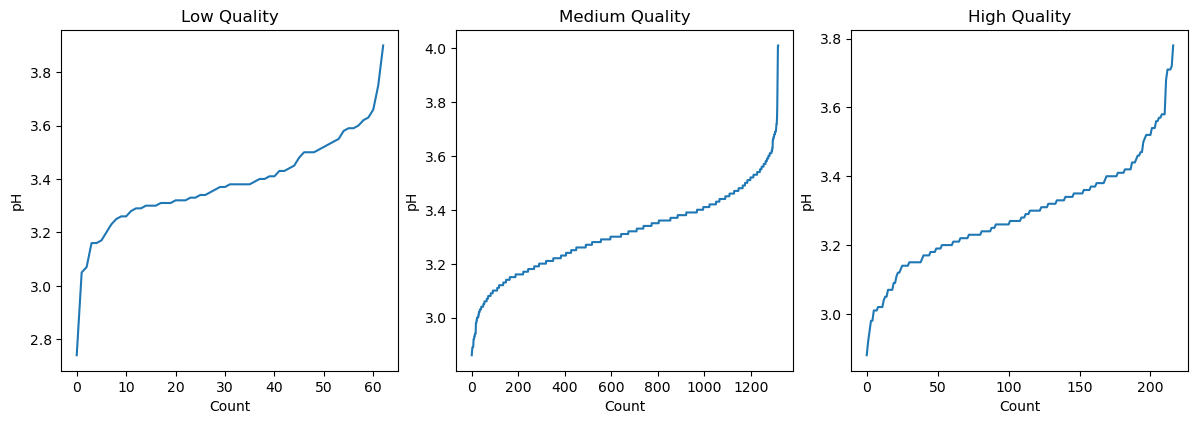

In [126]:
plt.style.use('default')
fig = plt.figure(figsize=plt.figaspect(0.5))
fig = plt.figure(figsize=plt.figaspect(0.3))
fig, axs = plt.subplots(1, 3 ,figsize=(12,4))
fig.tight_layout()
# axs[0].set_xlim([0-10,len(data_red[mask_low_red]['pH'].sort_values().reset_index()['pH'])-10000])
axs[0].plot(data_red[mask_low_red]['pH'].sort_values().reset_index()['pH'])
axs[0].set_title("Low Quality")
axs[0].set_xlabel("Count")
axs[0].set_ylabel("pH")

axs[1].plot(data_red[mask_mid_red]['pH'].sort_values().reset_index()['pH'])
axs[1].set_title("Medium Quality")
axs[1].set_xlabel("Count")
axs[1].set_ylabel("pH")
# axs[1].set_xlim([0-10,len(data_red[mask_mid_red]['pH'].sort_values().reset_index()['pH'])+10])


axs[2].plot(data_red[mask_high_red]['pH'].sort_values().reset_index()['pH'])
axs[2].set_title("High Quality")
axs[2].set_xlabel("Count")
axs[2].set_ylabel("pH")
# axs[2].set_xlim([0-10,len(data_red[mask_high_red]['pH'].sort_values().reset_index()['pH'])+10])



##### What one sees is that we reject the null hypothesis of normality for all tests bar the kolmogorov smirnov test ... (write about why this is)

###### Splitting the data into smaller subsets however... cannot reject normality

In [147]:
hail_mary_split = 'density'
shapiro(data_red[(data_red[hail_mary_split]>data_red[hail_mary_split].mean()) & (data_red['quality']>=7)]['pH'])

ShapiroResult(statistic=0.9842842817306519, pvalue=0.4165293574333191)

###### Also looking at the distribution of the log of the pH values

In [151]:
shapiro(np.log(data_red[mask_high_red]['pH']))

ShapiroResult(statistic=0.9881590604782104, pvalue=0.06957180052995682)

In [152]:
kstest(np.log(data_red[mask_high_red]['pH']), 'norm', args=(np.log(data_red[mask_high_red]['pH']).mean(), np.log(data_red[mask_high_red]['pH']).std()))   

KstestResult(statistic=0.05651450169434502, pvalue=0.47512455332556935)

In [155]:
anderson(np.log(data_red[mask_high_red]['pH']), 'norm')   

AndersonResult(statistic=0.7994471063447577, critical_values=array([0.566, 0.644, 0.773, 0.902, 1.073]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [134]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Plots for project ####

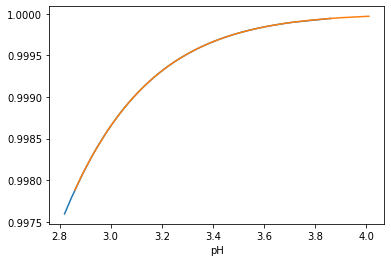

In [97]:
compare_plot(mask_mid_red,'pH',data_red)